In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Data

In [2]:
df = pd.read_csv("datasets/Heart Disease UCI.csv")

In [58]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_ECG,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,major_vessels,thal,target
0,63,male,asymptomatic,145,233,< 120 mg/dl,normal,150,no,2.3,upsloping,0,normal 1,disease
1,37,male,non-anginal,130,250,> 120 mg/dl,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,disease
2,41,female,atypical angina,130,204,> 120 mg/dl,normal,172,no,1.4,downsloping,0,fixed defect,disease
3,56,male,atypical angina,120,236,> 120 mg/dl,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,disease
4,57,female,typical angina,120,354,> 120 mg/dl,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,disease


In [57]:
df.shape

(302, 14)

# Data Preparation

<font color = 'blue'> null values in dataset </font>

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<font color ='blue'> duplicated columns </font>

In [17]:
df.duplicated().sum()

1

In [18]:
df.drop_duplicates(inplace=True,keep='first')

In [19]:
df.duplicated().sum()

0

# Feature Engineering

### Data Context (given with dataset)

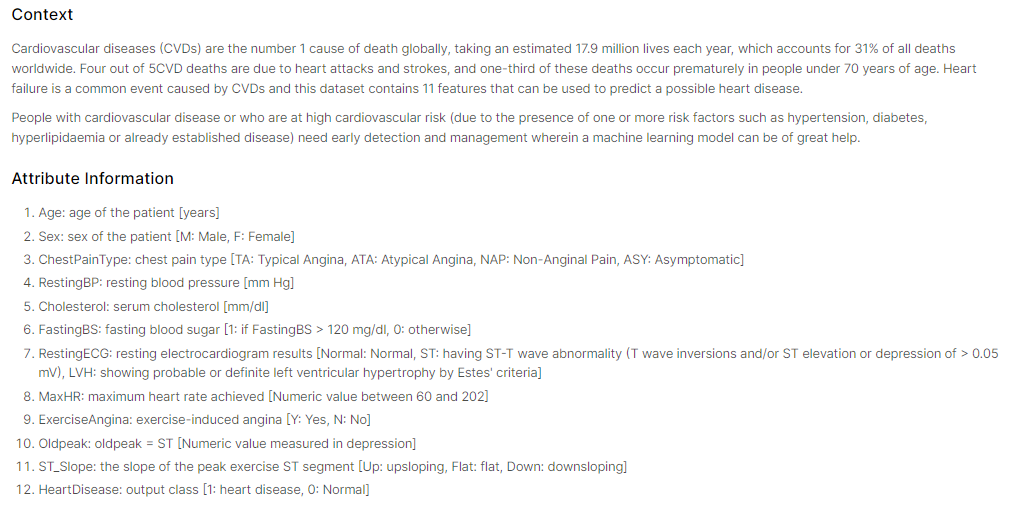

### rename columns 

In [20]:
df.rename(columns={
        'cp':'chest_pain_type',
        'trestbps':'resting_blood_pressure',
        'chol':'cholestoral',
        'fbs':'fasting_blood_sugar',
        'restecg':'resting_ECG',
        'thalach':'maximum_heart_rate',
        'exang':'exercise_induced_angina',
        'oldpeak':'ST_depression',
        'slope':'slope_peak_exercise_ST',
        'ca':'major_vessels'},
    inplace=True)

### Update (map) categorical attribute values (features) for better readability & plotting.

In [22]:
df['sex'] = df['sex'].map({0:'female', 1:'male'})

In [23]:
df['chest_pain_type'] = df['chest_pain_type'].map({
        0:'typical angina', 1:'atypical angina',
        2:'non-anginal',    3:'asymptomatic'})

In [24]:
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({
        0:'> 120 mg/dl', 1:'< 120 mg/dl'})

In [26]:
df['resting_ECG'] = df['resting_ECG'].map({
        0:'normal', 1:'ST-T wave abnormality', 2:'ventricular hypertrophy'})

In [27]:
df['exercise_induced_angina'] = df['exercise_induced_angina'].map({
        0:'no', 1:'yes'})

In [28]:
df['slope_peak_exercise_ST'] = df['slope_peak_exercise_ST'].map({
        0:'upsloping', 1:'flat', 2:'downsloping'})

In [29]:
df['thal'] = df['thal'].map({
        0:'normal 0',     1:'normal 1',
        2:'fixed defect', 3:'reversable defect'})

In [30]:
df['target'] = df['target'].map({0:'no disease', 1:'disease'})

In [31]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_ECG,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,major_vessels,thal,target
0,63,male,asymptomatic,145,233,< 120 mg/dl,normal,150,no,2.3,upsloping,0,normal 1,disease
1,37,male,non-anginal,130,250,> 120 mg/dl,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,disease
2,41,female,atypical angina,130,204,> 120 mg/dl,normal,172,no,1.4,downsloping,0,fixed defect,disease
3,56,male,atypical angina,120,236,> 120 mg/dl,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,disease
4,57,female,typical angina,120,354,> 120 mg/dl,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,disease


### Statistical Summary

In [39]:
df.describe(include=['O'])

,sex,chest_pain_type,fasting_blood_sugar,resting_ECG,exercise_induced_angina,slope_peak_exercise_ST,thal,target
count,302,302,302,302,302,302,302,302
unique,2,4,2,3,2,3,4,2
top,male,typical angina,> 120 mg/dl,ST-T wave abnormality,no,downsloping,fixed defect,disease
freq,206,143,257,151,203,141,165,164


In [55]:
[ print("\n --- \n",df[col].value_counts(),end='\n ========')
 for col in df if col in 
 ['sex','chest_pain_type',
  'fasting_blood_sugar',
  'resting_ECG',
  'excercise_induced_angina',
  'slope_peak_exercise_ST',
  'thai',
  'target']]


 --- 
 male      206
female     96
Name: sex, dtype: int64
 --- 
 typical angina     143
non-anginal         86
atypical angina     50
asymptomatic        23
Name: chest_pain_type, dtype: int64
 --- 
 > 120 mg/dl    257
< 120 mg/dl     45
Name: fasting_blood_sugar, dtype: int64
 --- 
 ST-T wave abnormality      151
normal                     147
ventricular hypertrophy      4
Name: resting_ECG, dtype: int64
 --- 
 downsloping    141
flat           140
upsloping       21
Name: slope_peak_exercise_ST, dtype: int64
 --- 
 disease       164
no disease    138
Name: target, dtype: int64

[None, None, None, None, None, None]

### Splitting Categorical and Numerical Data

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      302 non-null    int64  
 1   sex                      302 non-null    object 
 2   chest_pain_type          302 non-null    object 
 3   resting_blood_pressure   302 non-null    int64  
 4   cholestoral              302 non-null    int64  
 5   fasting_blood_sugar      302 non-null    object 
 6   resting_ECG              302 non-null    object 
 7   maximum_heart_rate       302 non-null    int64  
 8   exercise_induced_angina  302 non-null    object 
 9   ST_depression            302 non-null    float64
 10  slope_peak_exercise_ST   302 non-null    object 
 11  major_vessels            302 non-null    int64  
 12  thal                     302 non-null    object 
 13  target                   302 non-null    object 
dtypes: float64(1), int64(5), o

In [61]:
df.keys()

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'resting_ECG',
       'maximum_heart_rate', 'exercise_induced_angina', 'ST_depression',
       'slope_peak_exercise_ST', 'major_vessels', 'thal', 'target'],
      dtype='object')

In [62]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_ECG,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,major_vessels,thal,target
0,63,male,asymptomatic,145,233,< 120 mg/dl,normal,150,no,2.3,upsloping,0,normal 1,disease
1,37,male,non-anginal,130,250,> 120 mg/dl,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,disease
2,41,female,atypical angina,130,204,> 120 mg/dl,normal,172,no,1.4,downsloping,0,fixed defect,disease
3,56,male,atypical angina,120,236,> 120 mg/dl,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,disease
4,57,female,typical angina,120,354,> 120 mg/dl,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,disease


# Exploratory Data Analysis

In [72]:

cat_nom = ['sex','chest_pain_type','fasting_blood_sugar','resting_ECG','exercise_induced_angina',
           'slope_peak_exercise_ST','thal']

cat_ord = ['major_vessels']

cat = ['sex','chest_pain_type','fasting_blood_sugar','resting_ECG','exercise_induced_angina',
       'slope_peak_exercise_ST','thal','major_vessels']

num     = ['age','resting_blood_pressure','cholestoral','maximum_heart_rate','ST_depression']

y_target = ['target']



## Categorical variables

In [94]:
sns.set(rc={'figure.figsize':[9,9]},font_scale=1.2) 

=== Sex:                                                          ====
male      206
female     96
Name: sex, dtype: int64


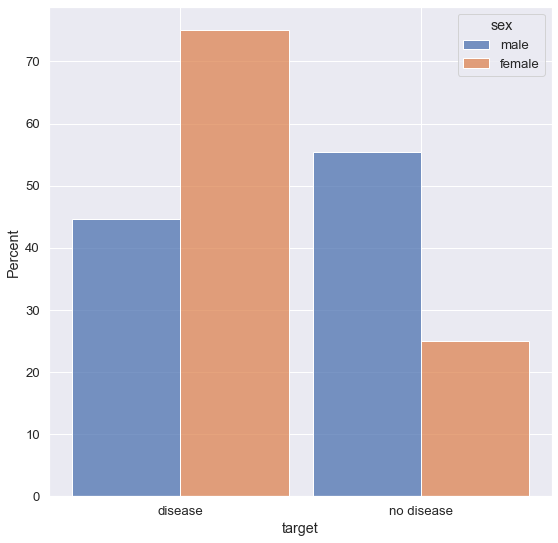

=== Chest pain type:                                              ====
typical angina     143
non-anginal         86
atypical angina     50
asymptomatic        23
Name: chest_pain_type, dtype: int64


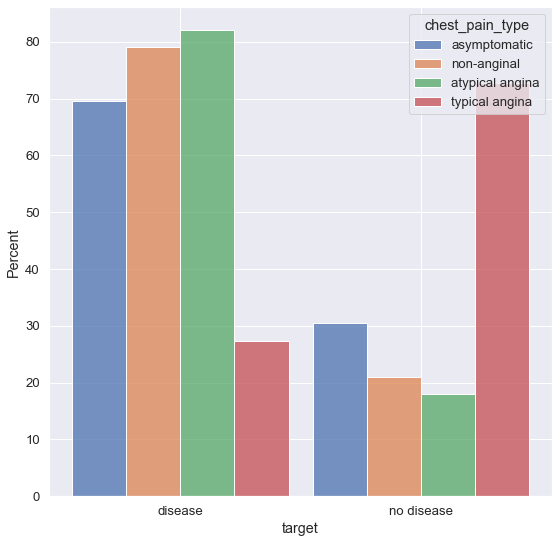

=== Fasting blood sugar:                                          ====
> 120 mg/dl    257
< 120 mg/dl     45
Name: fasting_blood_sugar, dtype: int64


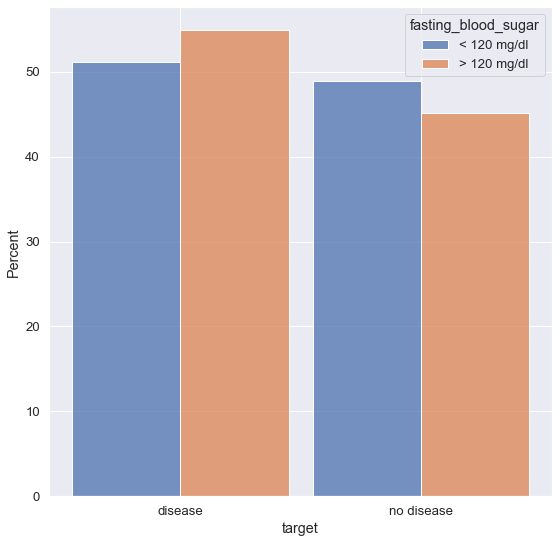

=== Resting ecg:                                                  ====
ST-T wave abnormality      151
normal                     147
ventricular hypertrophy      4
Name: resting_ECG, dtype: int64


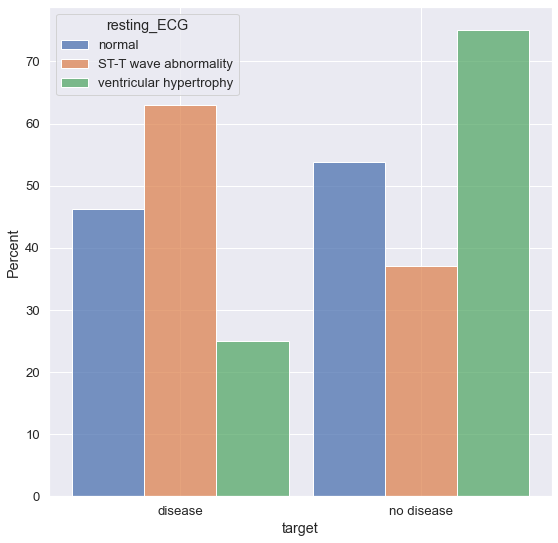

=== Exercise induced angina:                                      ====
no     203
yes     99
Name: exercise_induced_angina, dtype: int64


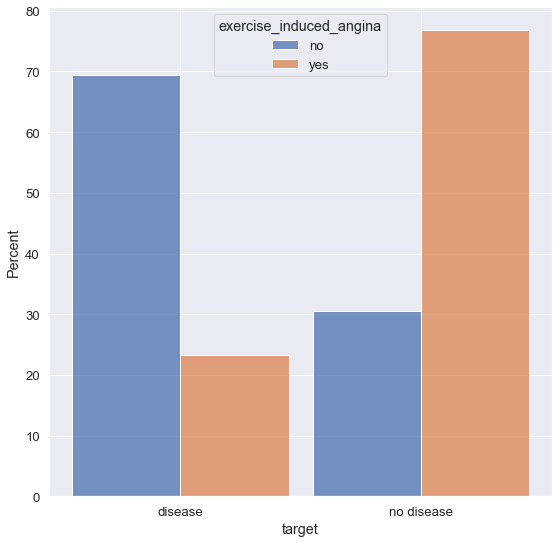

=== Slope peak exercise st:                                       ====
downsloping    141
flat           140
upsloping       21
Name: slope_peak_exercise_ST, dtype: int64


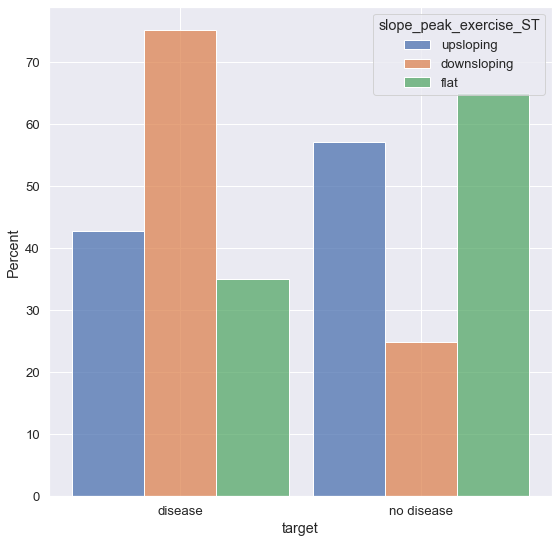

=== Thal:                                                         ====
fixed defect         165
reversable defect    117
normal 1              18
normal 0               2
Name: thal, dtype: int64


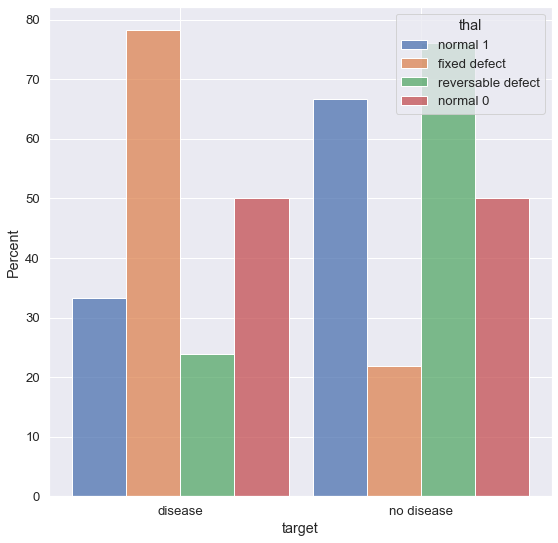

=== Major vessels:                                                ====
0    175
1     65
2     38
3     20
4      4
Name: major_vessels, dtype: int64


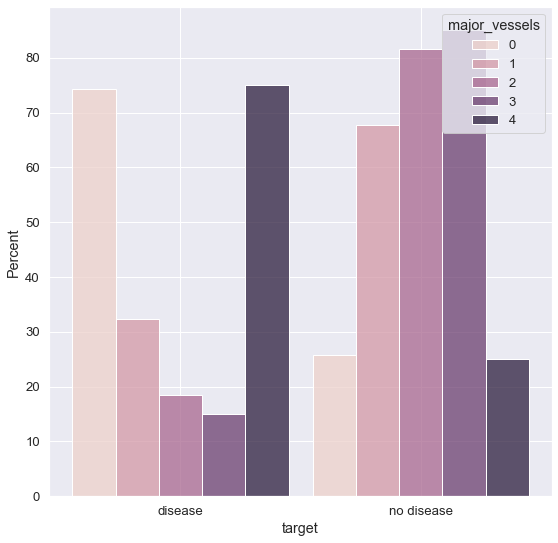

In [124]:
for ele in cat:
    print('='* 70)
    print(f'=== {ele.replace("_"," ").capitalize()}:' + ' ' * (61 - len(ele)) + '====')
    print('='* 70)
    print(df[ele].value_counts())
    new_plot = sns.histplot(data = df, x = 'target', hue = ele,common_norm= False,multiple='dodge',stat='percent',shrink=0.9)
    cat_plots.append(new_plot)
    plt.show()

### Observations:

- sex: the disease is more represented with females than males


- chest_pain_type: asymptomatic chest pain is mostly prevelent in 
non diseased people. while the other chest pain types are more represented
with sick patients.


- fasting_blood_sugar: slight increase in sick patients with >120 mg/dl fasting blood
pressure


- resting_ECG: ST-T wave abnormality is more represented with Diseased patients
while ventricular hypertrophy is less represented.


- exercise_induced_angina: exercise induced_angina is less represented 
with heart disease patients than healthy people.


- slope_peak_exercise_ST: downsloping was more prevelent with heart disease
patients


- thal: fixed defect is more prevelent in diseased patients. However, 
reversable defect is more prevelent with healthy people.


- major_vessels: heart disease patients are mostly represented with 0 or 4
values. while healthy people are between 1 and 3





=== Age:                                                          ====
count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64


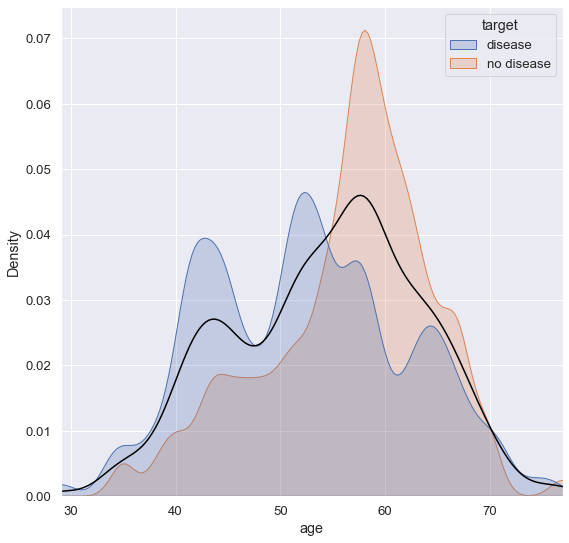

=== Resting blood pressure:                                       ====
count    302.000000
mean     131.602649
std       17.563394
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: resting_blood_pressure, dtype: float64


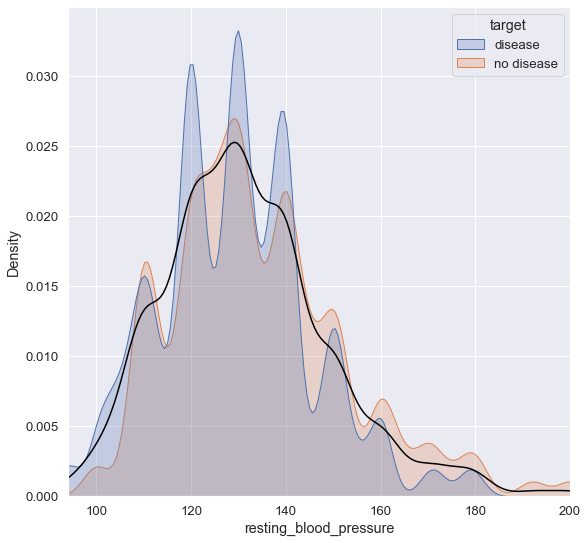

=== Cholestoral:                                                  ====
count    302.000000
mean     246.500000
std       51.753489
min      126.000000
25%      211.000000
50%      240.500000
75%      274.750000
max      564.000000
Name: cholestoral, dtype: float64


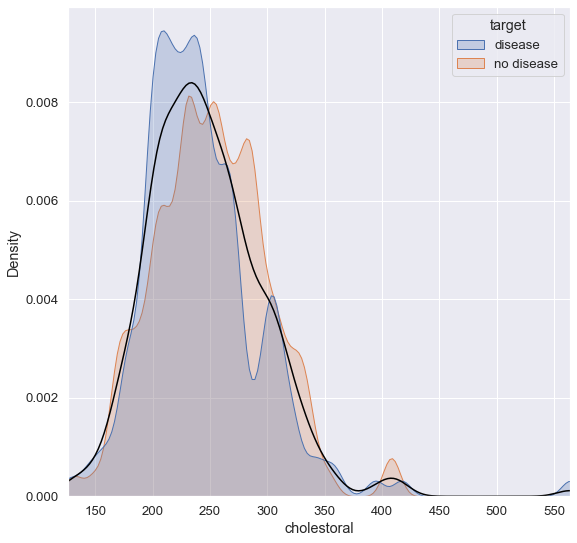

=== Maximum heart rate:                                           ====
count    302.000000
mean     149.569536
std       22.903527
min       71.000000
25%      133.250000
50%      152.500000
75%      166.000000
max      202.000000
Name: maximum_heart_rate, dtype: float64


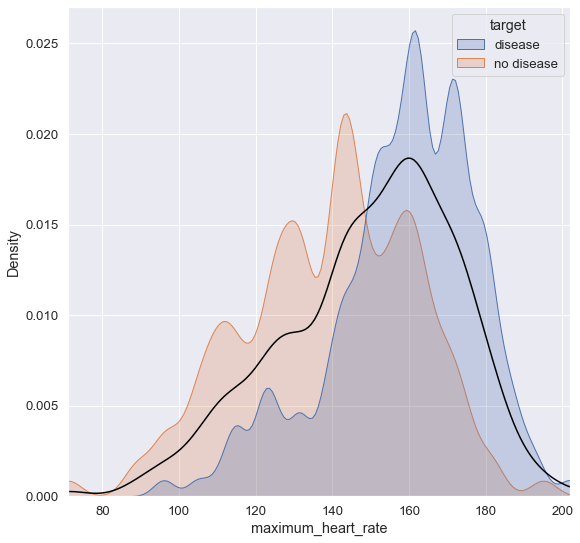

=== St depression:                                                ====
count    302.000000
mean       1.043046
std        1.161452
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: ST_depression, dtype: float64


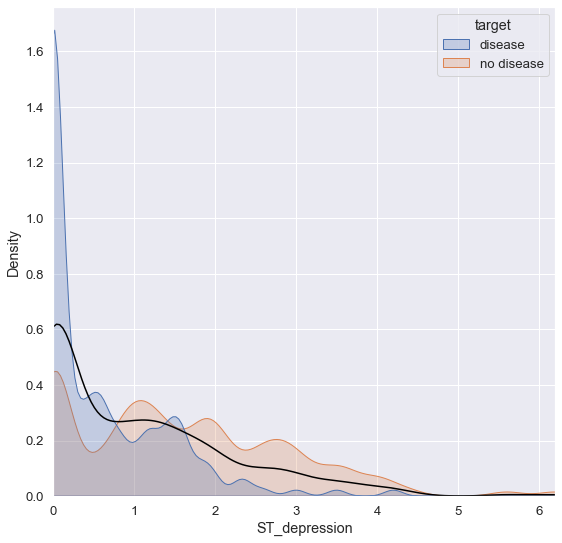

In [148]:
for ele in num:
    print('='* 70)
    print(f'=== {ele.replace("_"," ").capitalize()}:' + ' ' * (61 - len(ele)) + '====')
    print('='* 70)
    print(df[ele].describe())
    sns.kdeplot(data = df, x = ele , hue = 'target',common_norm= False,multiple='layer',
                shade=True,bw_adjust = 0.4,common_grid=True)
    sns.kdeplot(data = df, x = ele, common_norm=False, color='black',shade=False,common_grid=True,bw_adjust = 0.7)
    plt.xlim([df[ele].min(),df[ele].max()])
    cat_plots.append(new_plot)
    plt.show()

### Graphing ST_depression without zero values

=== St depression:                                                ====
count    302.000000
mean       1.043046
std        1.161452
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: ST_depression, dtype: float64


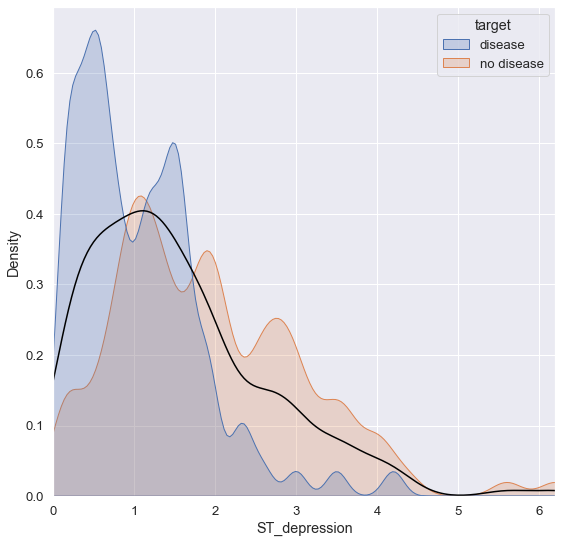

In [149]:
ele = 'ST_depression'
print('='* 70)
print(f'=== {ele.replace("_"," ").capitalize()}:' + ' ' * (61 - len(ele)) + '====')
print('='* 70)
print(df[ele].describe())
sns.kdeplot(data = df[df['ST_depression'] != 0], x = ele , hue = 'target',common_norm= False,multiple='layer',
            shade=True,bw_adjust = 0.4,common_grid=True)
sns.kdeplot(data = df[df['ST_depression'] != 0], x = ele, common_norm=False, color='black',shade=False,common_grid=True,bw_adjust = 0.7)
plt.xlim([df[ele].min(),df[ele].max()])
cat_plots.append(new_plot)
plt.show()

In [76]:
from sklearn.model_selection import train_test_split

XC_train, XC_test, yc_train, yc_test = train_test_split(X_cat,y_cat)

In [92]:
from sklearn.tree import DecisionTreeClassifier

dt_mod = DecisionTreeClassifier(max_depth=10,min_samples_leaf=10,min_samples_split=10)
dt_mod.fit(XC_train,yc_train)
yc_pred = dt_mod.predict(XC_test)

from sklearn.metrics import accuracy_score,r2_score

accuracy_score(y_true=yc_test,y_pred=yc_pred)

0.8421052631578947

In [98]:
from sklearn.svm import SVC

svc_mod = SVC(kernel= 'rbf',gamma = 1)
svc_mod.fit(XC_train,yc_train)
yc_pred = svc_mod.predict(XC_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_true=yc_test,y_pred=yc_pred)

G:\Apps\Anaconda\install\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8157894736842105

In [105]:
X_num = df[unwanted].drop('target',axis = 1)
y_num = df['target']
X_num

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


In [101]:
from sklearn.model_selection import train_test_split

XN_train, XN_test, yn_train, yn_test = train_test_split(X_num,y_num)

In [103]:
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression

r_mod = LinearRegression()
r_mod.fit(XN_train,yn_train)

yn_pred = r_mod.predict(XN_test)

r2_score(y_pred=yn_pred,y_true=yn_test)

0.24484839930336189

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trestbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


<font color = 'blue'> no null values</font>

In [15]:
df.age.describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

# Data Cleaning / Wrangling

In [6]:
df[df['age'] < 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
